In [1]:
import pandas as pd  # استيراد مكتبة Pandas لمعالجة البيانات وتحليلها
import matplotlib.pyplot as plt  # استيراد مكتبة Matplotlib لإنشاء الرسوم البيانية والمخططات
import seaborn as sns  # استيراد مكتبة Seaborn لإنشاء رسوم بيانية متقدمة وتحليل البيانات بصريًا

In [2]:
df = pd.read_csv('StudentsPerformance.csv')  # تحميل بيانات الطلاب من ملف CSV وتحويلها إلى DataFrame
df  # عرض صفوف  البيانات افتراضيًا عند تشغيل الخلية 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()  #  عرض معلومات عن DataFrame ،أنواع البيانات 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()  # حساب عدد القيم المفقودة (NaN) في كل عمود من DataFrame

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.nunique()  # حساب عدد القيم الفريدة (المميزة) في كل عمود من DataFrame

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [6]:
df.columns  # عرض أسماء جميع الأعمدة الموجودة في DataFrame

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(r'[ /]', '_', regex=True)  
# استبدال أي مسافة فارغة أو شرطة مائلة '/' في أسماء الأعمدة بعلامة '_' لتحسين الوصول إلى الأعمدة برمجيًا

df  # عرض DataFrame بعد تعديل أسماء الأعمدة

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
df.describe()  # عرض الإحصائيات الوصفية للبيانات الرقمية في DataFrame

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# حساب عدد الطلاب الذين حصلوا على الدرجة الكاملة (100) في كل مادة

full_reading = df[df['reading_score'] == 100]['reading_score'].count()  # عدد الطلاب الذين حصلوا على 100 في القراءة
full_writing = df[df['writing_score'] == 100]['writing_score'].count()  # عدد الطلاب الذين حصلوا على 100 في الكتابة
full_math = df[df['math_score'] == 100]['math_score'].count()  # عدد الطلاب الذين حصلوا على 100 في الرياضيات

# طباعة النتائج
print(f"Number of students with full marks in Reading: {full_reading}")  
print(f"Number of students with full marks in Writing: {full_writing}")  
print(f"Number of students with full marks in Math: {full_math}")  

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [10]:
pass_grit = 50  # تعيين الحد الأدنى للنجاح في المواد الدراسية (أي طالب يحصل على أقل من 50 يعتبر راسبًا)

# إنشاء عمود جديد يحدد ما إذا كان الطالب ناجحًا في الرياضيات أم لا
df['pass_math'] = 'yes'  # تعيين القيمة الافتراضية لجميع الطلاب بأنها 'ناجح'
filt = (df['math_score'] < pass_grit)  # إنشاء فلتر للطلاب الذين حصلوا على درجة أقل من 50
df.loc[filt, 'pass_math'] = 'no'  # تعيين 'راسب' للطلاب الذين لم يحققوا الحد الأدنى
df[['math_score', 'pass_math']].head()  # عرض أول 5 صفوف من درجات الرياضيات وحالة النجاح

# إنشاء عمود جديد يحدد ما إذا كان الطالب ناجحًا في القراءة أم لا
df['pass_reading'] = 'yes'  # تعيين القيمة الافتراضية لجميع الطلاب بأنها 'ناجح'
filt = (df['reading_score'] < pass_grit)  # إنشاء فلتر للطلاب الذين حصلوا على درجة أقل من 50
df.loc[filt, 'pass_reading'] = 'no'  # تعيين 'راسب' للطلاب الذين لم يحققوا الحد الأدنى
df[['reading_score', 'pass_reading']].head()  # عرض أول 5 صفوف من درجات القراءة وحالة النجاح

# إنشاء عمود جديد يحدد ما إذا كان الطالب ناجحًا في الكتابة أم لا
df['pass_writing'] = 'yes'  # تعيين القيمة الافتراضية لجميع الطلاب بأنها 'ناجح'
filt = (df['writing_score'] < pass_grit)  # إنشاء فلتر للطلاب الذين حصلوا على درجة أقل من 50
df.loc[filt, 'pass_writing'] = 'no'  # تعيين 'راسب' للطلاب الذين لم يحققوا الحد الأدنى
df[['writing_score', 'pass_writing']].head()  # عرض أول 5 صفوف من درجات الكتابة وحالة النجاح

df  # عرض DataFrame بعد إضافة أعمدة النجاح والرسوب

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_math,pass_reading,pass_writing
0,female,group B,bachelor's degree,standard,none,72,72,74,yes,yes,yes
1,female,group C,some college,standard,completed,69,90,88,yes,yes,yes
2,female,group B,master's degree,standard,none,90,95,93,yes,yes,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,no,yes,no
4,male,group C,some college,standard,none,76,78,75,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,yes,yes,yes
996,male,group C,high school,free/reduced,none,62,55,55,yes,yes,yes
997,female,group C,high school,free/reduced,completed,59,71,65,yes,yes,yes
998,female,group D,some college,standard,completed,68,78,77,yes,yes,yes


Average score in math: 66.089
Average score in reading: 69.169
Average score in writing: 68.054


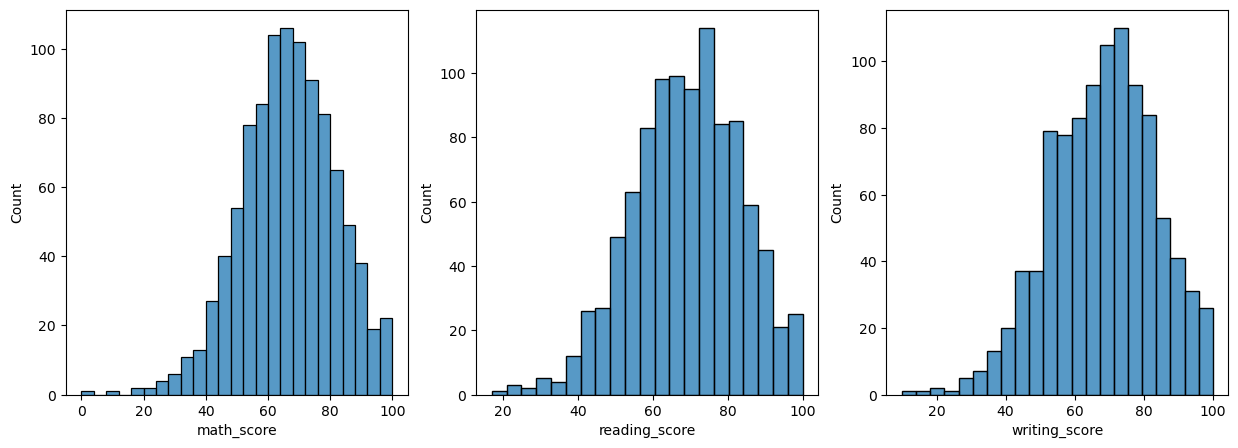

In [11]:
# إنشاء مخططات هيستوغرام لتحليل توزيع الدرجات في كل مادة
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # إنشاء ثلاث رسوم بيانية في صف واحد مع ضبط حجم الشكل

sns.histplot(x='math_score', data=df, ax=ax[0])# رسم توزيع درجات الطلاب في الرياضيات
sns.histplot(x='reading_score', data=df, ax=ax[1])  # رسم توزيع درجات الطلاب في القراءة
sns.histplot(x='writing_score', data=df, ax=ax[2]) # رسم توزيع درجات الطلاب في الكتابة

# حساب متوسط الدرجات في كل مادة
mean_math = df['math_score'].mean()
mean_reading = df['reading_score'].mean()
mean_writing = df['writing_score'].mean()

# طباعة متوسط الدرجات لكل مادة
print(f"Average score in math: {mean_math}\nAverage score in reading: {mean_reading}\nAverage score in writing: {mean_writing}") 

pass_math
no     135
yes    865
Name: pass_math, dtype: int64
pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64
pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64


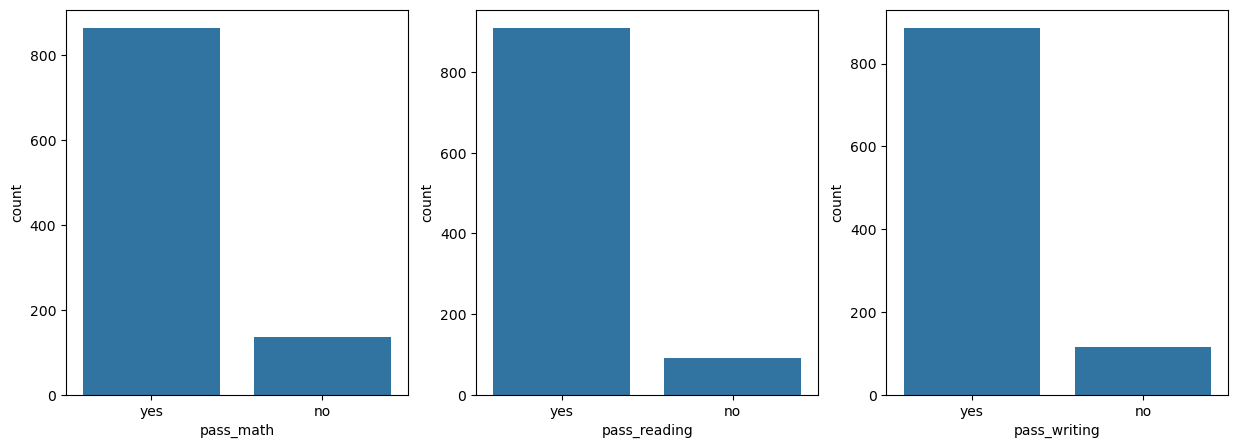

In [12]:
# إنشاء 3 مخططات شريطية (Bar Charts) لتحليل عدد الطلاب الناجحين والراسبين في كل مادة
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # إنشاء 3 رسوم بيانية في صف واحد مع ضبط حجم الشكل

sns.countplot(x='pass_math', data=df, ax=ax[0])  # رسم عدد الطلاب الناجحين والراسبين في الرياضيات
sns.countplot(x='pass_reading', data=df, ax=ax[1]) # رسم عدد الطلاب الناجحين والراسبين في القراءة 
sns.countplot(x='pass_writing', data=df, ax=ax[2]) # رسم عدد الطلاب الناجحين والراسبين في الكتابة 

# حساب عدد الطلاب الناجحين والراسبين في كل مادة
math_count = df.groupby('pass_math')['pass_math'].count()  
print(math_count)  # طباعة عدد الطلاب الناجحين والراسبين في الرياضيات

reading_count = df.groupby('pass_reading')['pass_reading'].count()  
print(reading_count)  # طباعة عدد الطلاب الناجحين والراسبين في القراءة

writing_count = df.groupby('pass_writing')['pass_writing'].count()  
print(writing_count)  # طباعة عدد الطلاب الناجحين والراسبين في الكتابة

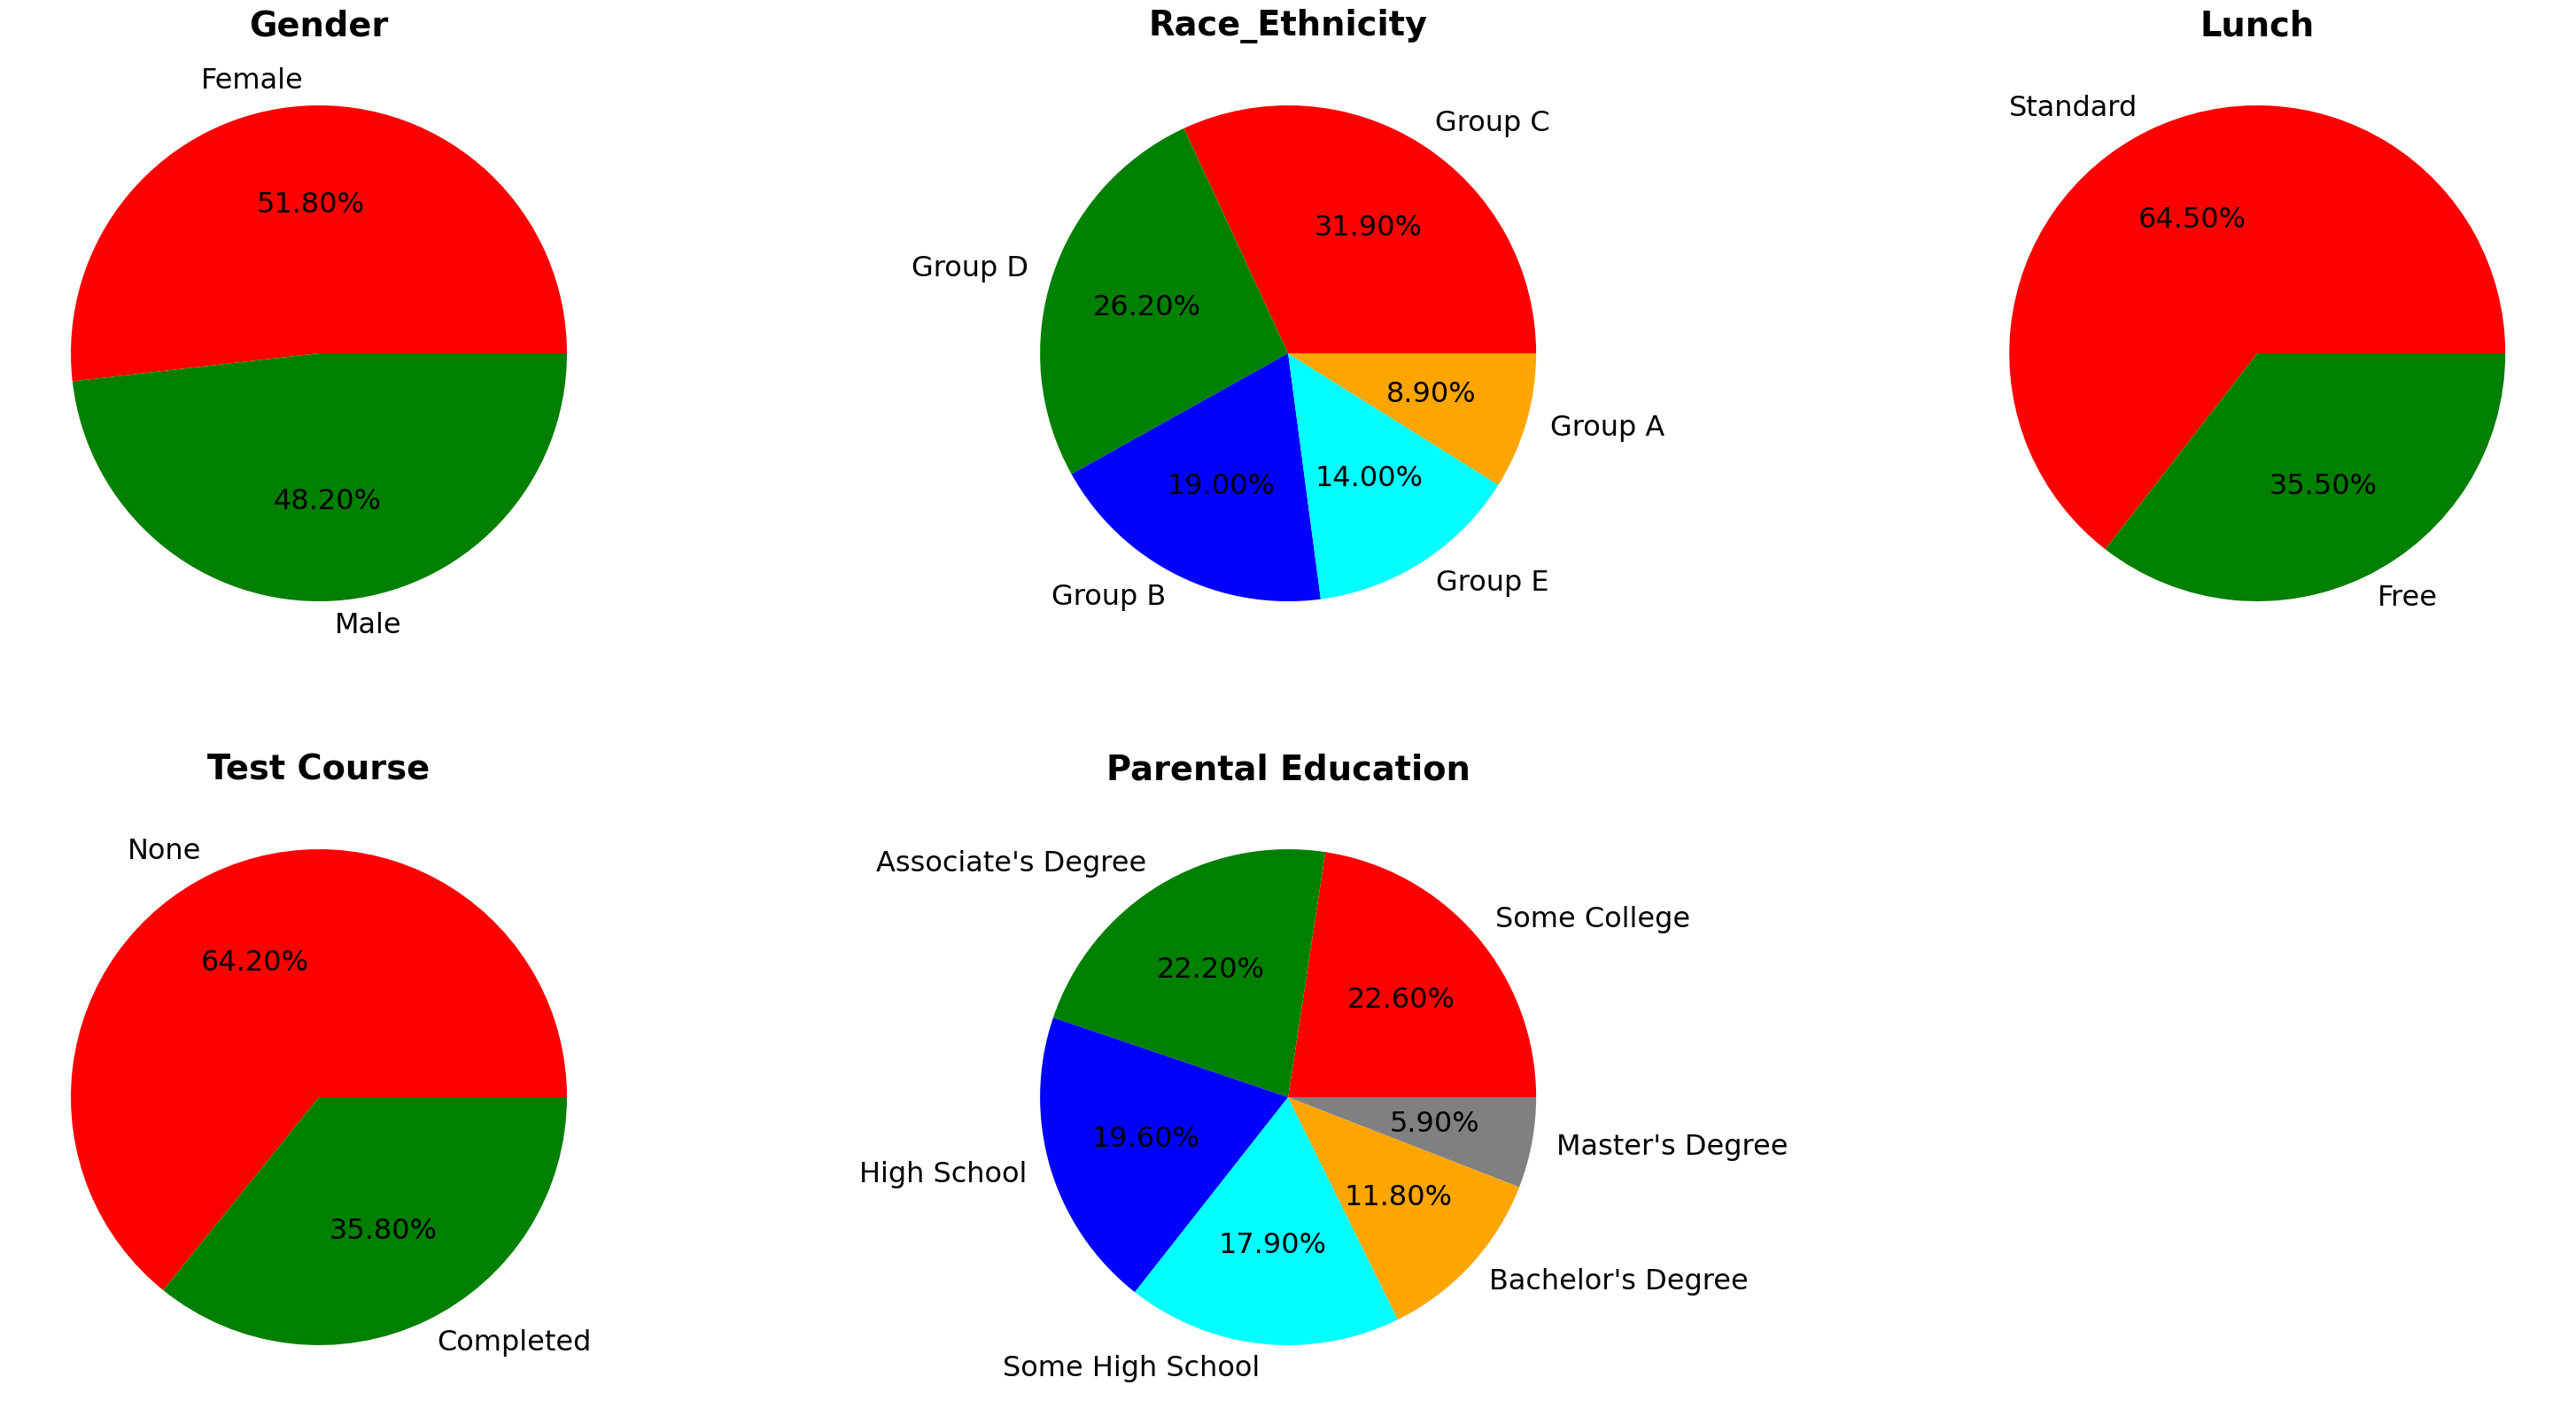

In [13]:
# ضبط إعدادات الرسم البياني
plt.rcParams['figure.figsize'] = (40, 20)  # تحديد حجم الشكل الرئيسي للرسم
plt.rcParams['font.size'] = 23  # تعيين حجم الخط لجميع الرسومات

# رسم المخططات الدائرية لتحليل توزيع الفئات المختلفة

# المخطط الأول: توزيع الجنس (ذكر / أنثى)
plt.subplot(2, 3, 1)  # تحديد موقع المخطط الأول (2 صفوف، 3 أعمدة، هذا هو الأول)
size = df['gender'].value_counts()  # حساب عدد الذكور والإناث
labels = ['Female', 'Male']  # تسميات الفئات
color = ['red', 'green']  # تعيين الألوان

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')  # رسم المخطط الدائري مع عرض النسب المئوية
plt.title('Gender', fontweight='bold')  # تعيين عنوان المخطط بخط عريض

# المخطط الثاني: توزيع العرق / الإثنية
plt.subplot(2, 3, 2)  # تحديد موقع المخطط الثاني
size = df['race_ethnicity'].value_counts()  # حساب عدد الطلاب في كل مجموعة عرقية
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']  # التسميات
color = ['red', 'green', 'blue', 'cyan', 'orange']  # تعيين الألوان

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')  # رسم المخطط الدائري
plt.title('Race_Ethnicity', fontweight='bold')  # تعيين العنوان

# المخطط الثالث: توزيع نوع الغداء (مدفوع / مجاني)
plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()  # حساب عدد الطلاب الذين يتناولون الغداء المجاني أو المدفوع
labels = ['Standard', 'Free']  # التسميات
color = ['red', 'green']  # الألوان

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')  # رسم المخطط
plt.title('Lunch', fontweight='bold')  # العنوان

# المخطط الرابع: توزيع الطلاب حسب إعدادهم المسبق للاختبار
plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()  # حساب عدد الطلاب الذين أكملوا الدورة التدريبية
labels = ['None', 'Completed']  # التسميات
color = ['red', 'green']  # الألوان

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')  # رسم المخطط
plt.title('Test Course', fontweight='bold')  # العنوان

# المخطط الخامس: توزيع المستوى التعليمي للأهل
plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()  # حساب عدد الطلاب بناءً على مستوى تعليم الأهل
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]  # التسميات
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']  # الألوان

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')  # رسم المخطط
plt.title('Parental Education', fontweight='bold')  # العنوان

# عرض جميع الرسومات البيانية
plt.show()

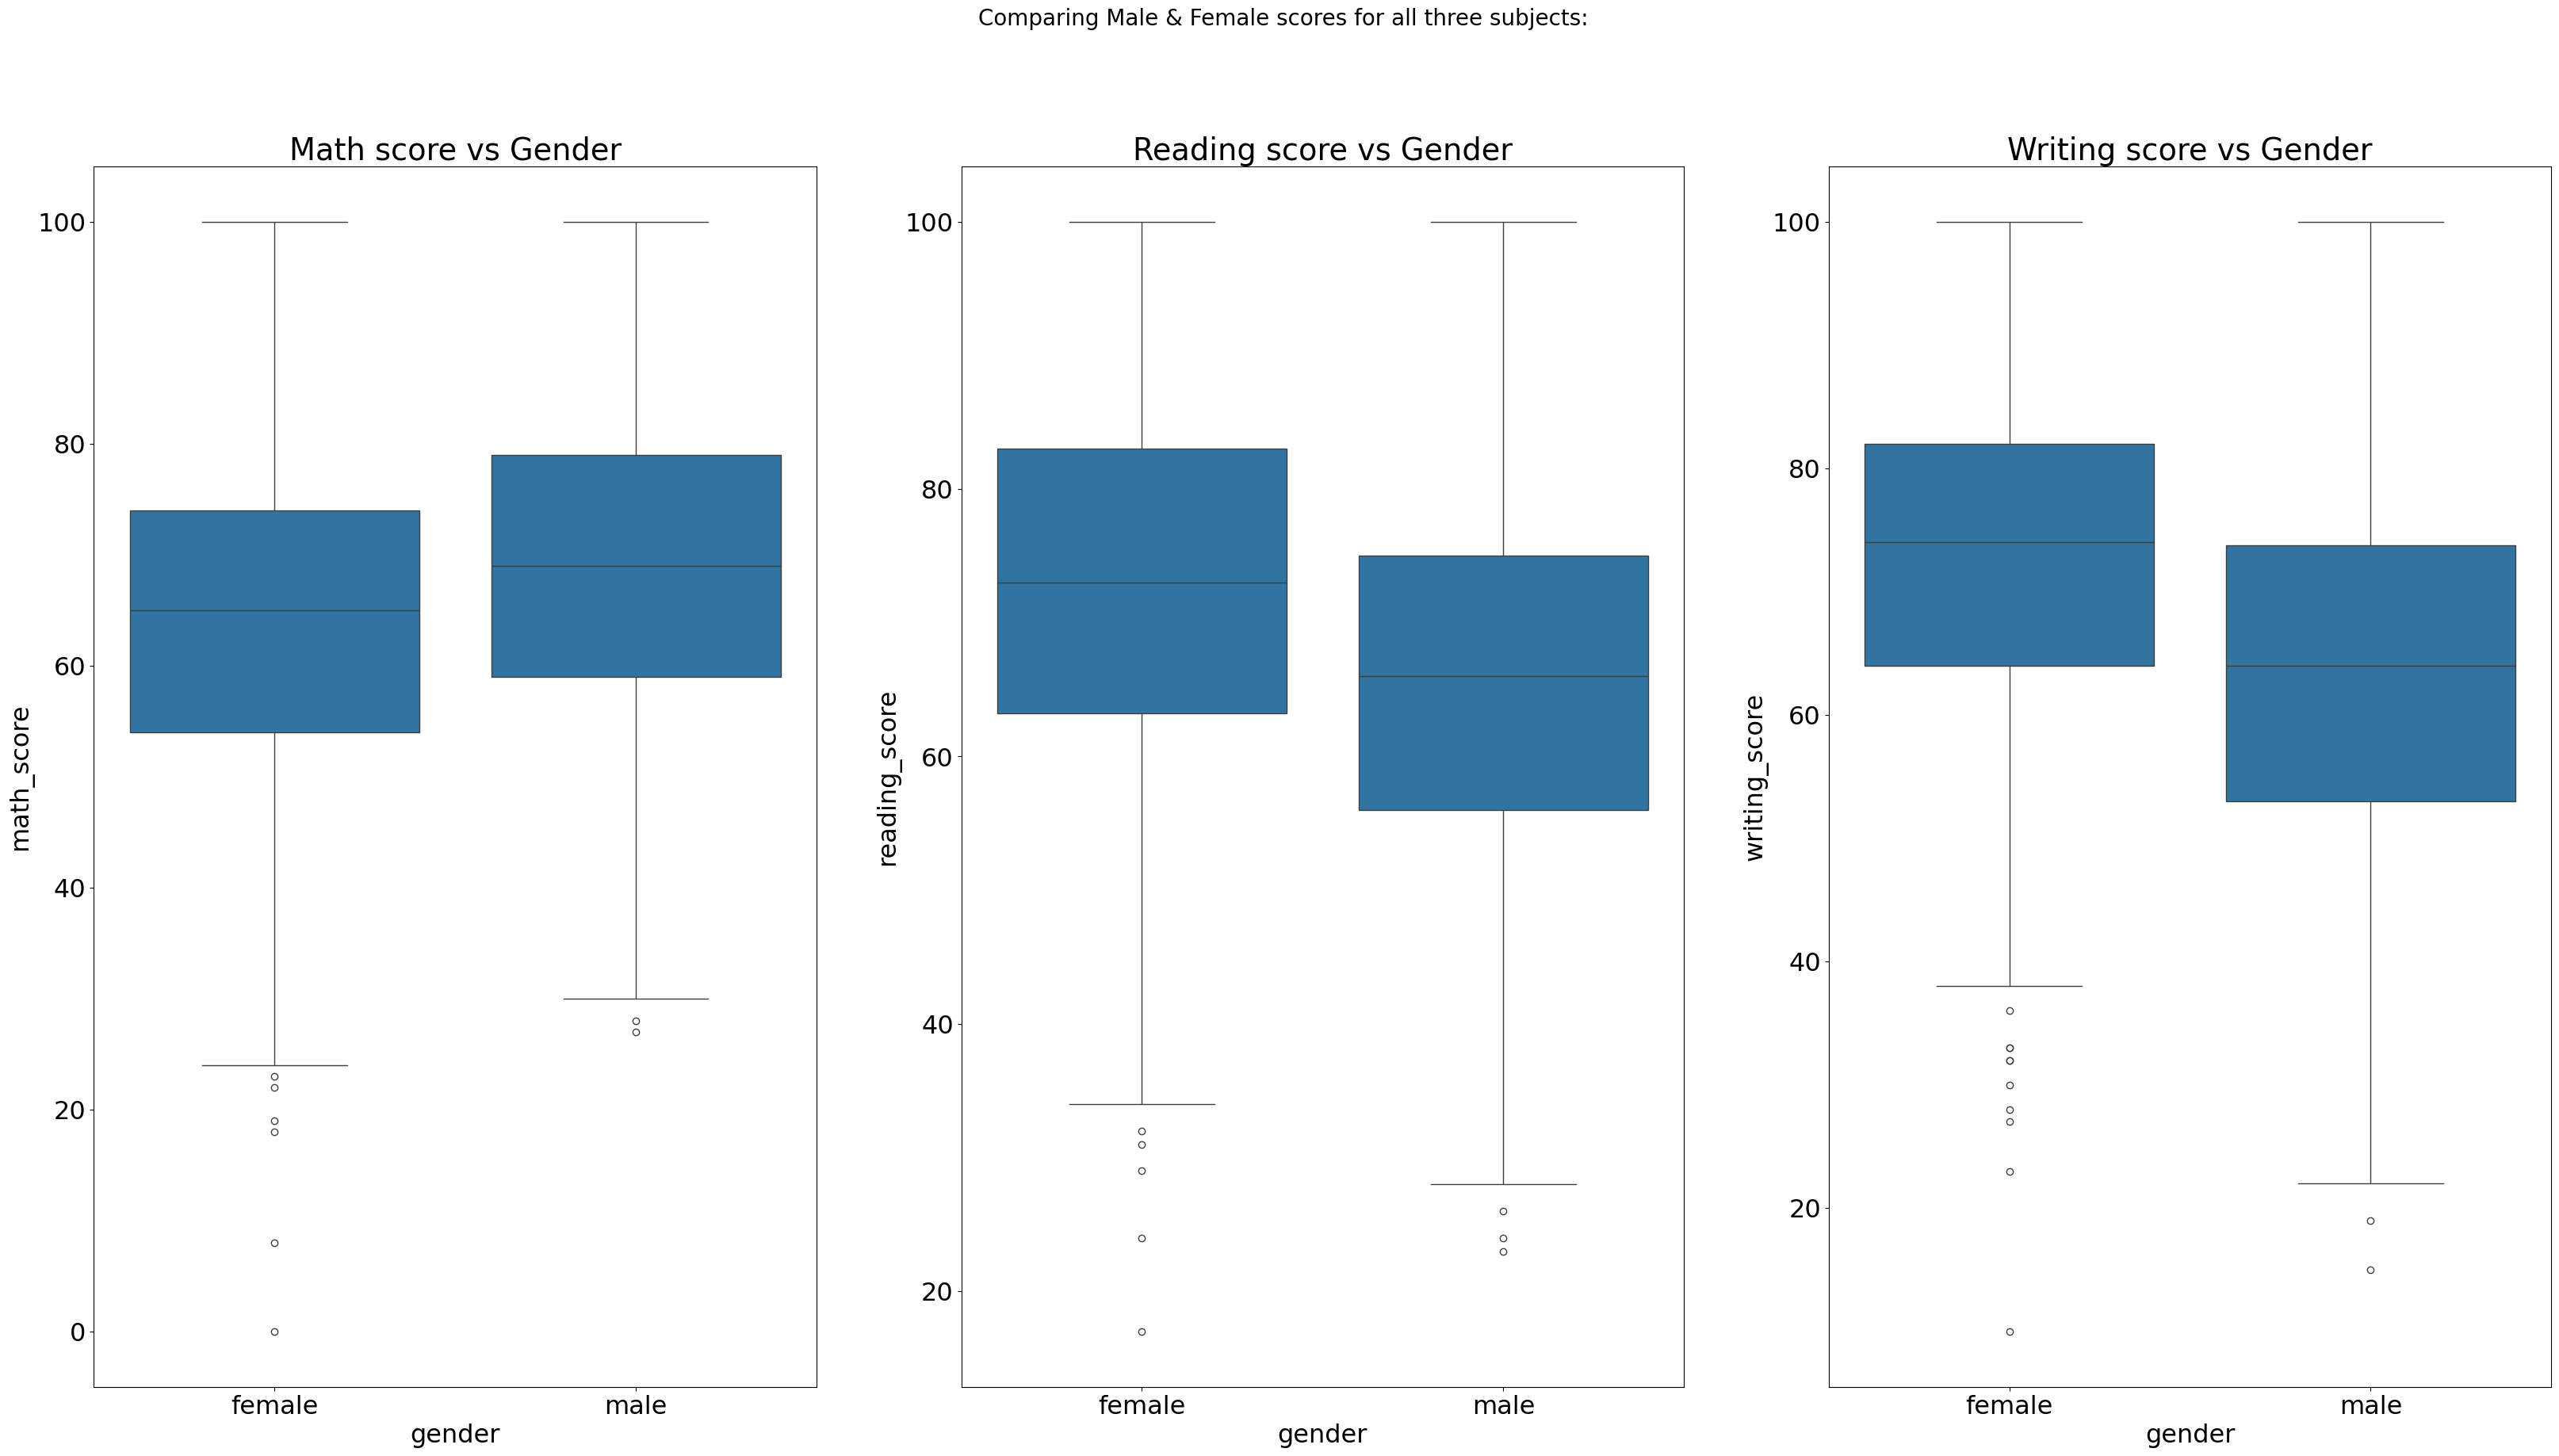

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3) # إنشاء الشكل والمخططات الجانبية (3 مخططات على صف واحد)

fig.suptitle('Comparing Male & Female scores for all three subjects:', fontsize=20)# تعيين عنوان عام للشكل

# 📌 المخطط الأول: مقارنة درجات الرياضيات بين الذكور والإناث
sns.boxplot(x='gender', y='math_score', data=df, ax=ax1)  # رسم مخطط Boxplot
ax1.title.set_text('Math score vs Gender')  # تعيين عنوان المخطط

# 📌 المخطط الثاني: مقارنة درجات القراءة بين الذكور والإناث
sns.boxplot(x='gender', y='reading_score', data=df, ax=ax2)
ax2.title.set_text('Reading score vs Gender')

# 📌 المخطط الثالث: مقارنة درجات الكتابة بين الذكور والإناث
sns.boxplot(x='gender', y='writing_score', data=df, ax=ax3)
ax3.title.set_text('Writing score vs Gender')

# عرض المخططات
plt.show()

C:\Users\next\AppData\Local\Temp\ipykernel_9508\384710452.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)  # تدوير عناوين المحور السيني لجعلها أوضح
C:\Users\next\AppData\Local\Temp\ipykernel_9508\384710452.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)
C:\Users\next\AppData\Local\Temp\ipykernel_9508\384710452.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30)


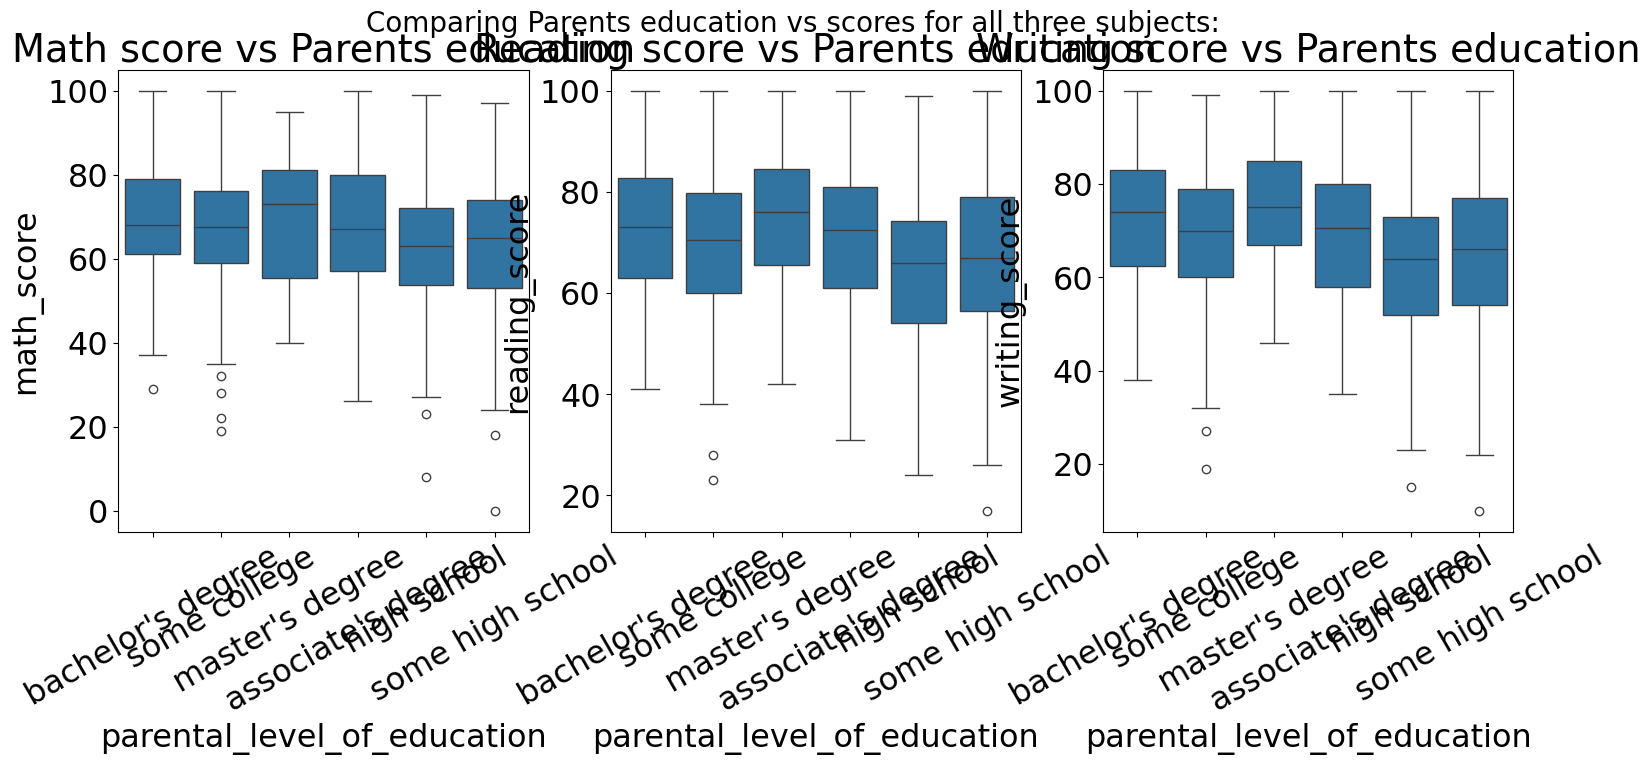

In [15]:
# إنشاء الشكل والمخططات الجانبية (3 مخططات على صف واحد)
fig, ax = plt.subplots(1, 3,)

# تعيين عنوان عام للشكل
fig.suptitle('Comparing Parents education vs scores for all three subjects:', fontsize=20)

# 📌 المخطط الأول: مقارنة درجات الرياضيات بناءً على مستوى تعليم الأهل
sns.boxplot(x='parental_level_of_education', y='math_score', data=df, ax=ax[0])  # رسم مخطط Boxplot
ax[0].set_title('Math score vs Parents education')  # تعيين عنوان المخطط
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)  # تدوير عناوين المحور السيني لجعلها أوضح

# 📌 المخطط الثاني: مقارنة درجات القراءة بناءً على مستوى تعليم الأهل
sns.boxplot(x='parental_level_of_education', y='reading_score', data=df, ax=ax[1])
ax[1].set_title('Reading score vs Parents education')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)

# 📌 المخطط الثالث: مقارنة درجات الكتابة بناءً على مستوى تعليم الأهل
sns.boxplot(x='parental_level_of_education', y='writing_score', data=df, ax=ax[2])
ax[2].set_title('Writing score vs Parents education')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30)

# عرض المخططات
plt.show()